# Identifying Iris Species
***

In [2]:
import pandas as pd
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Style and colours that seaborn will use
colour_palette = ["#F90505", "#8800FF","#23D5AC", "#C2DF31", "#FF9300"]
sns.set(style='white', color_codes=True)
sns.set_palette(colour_palette)

%matplotlib inline

### Import the Data
***
We will read the iris.csv file from the directory as a Pandas dataframe. The data can be downloaded from [Kaggle](https://www.kaggle.com/uciml/iris)

In [3]:
iris_df = pd.read_csv("iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


This dataset has four main features, sepal length, sepal width, petal length and petal width, all of which are in centimetres.
Each row is also classified by one of three Iris species, either setosa, versicolor or virginica. There is 150 unique entries with 50 flowers from each of the three species.

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Since our data is in a Pandas Dataframe, we have no need for the 'Id' column and we will just drop it.

In [6]:
iris_df.drop('Id', axis=1, inplace=True)

### Visualizing the Data
***

First lets create a scatter matrix of the different features, giving each species of Iris a different colour. Below we can see that, for most feature match-ups, there seems to be distinct clustering of the differnt species. 

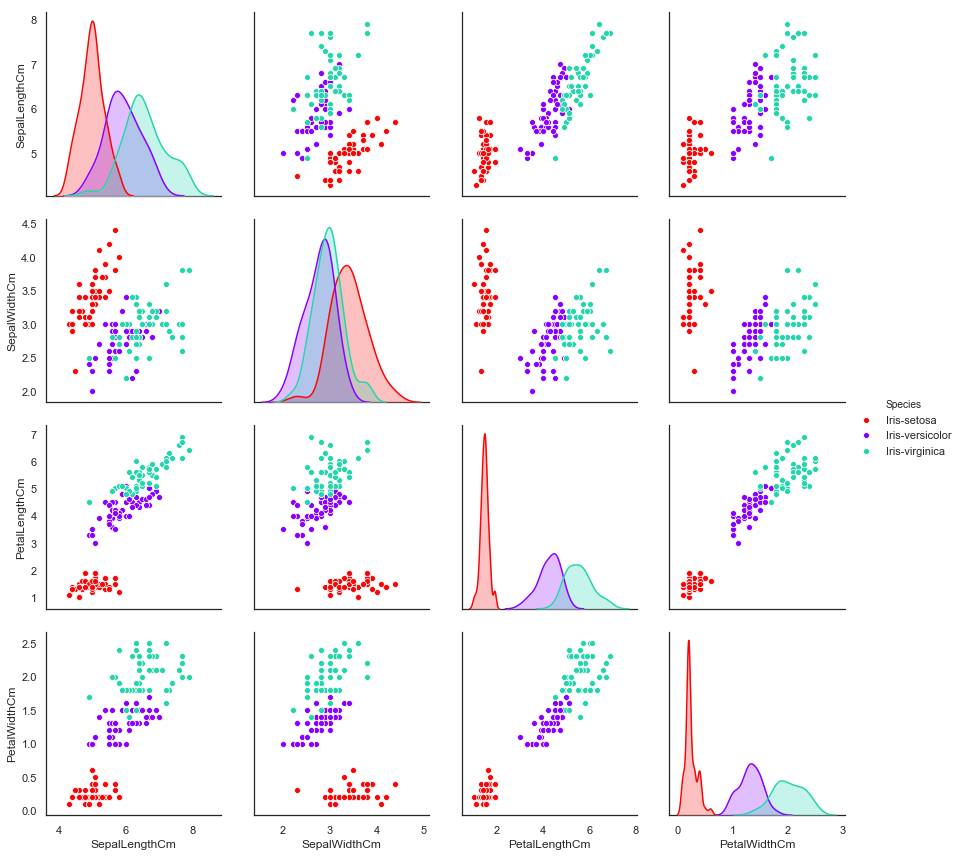

In [7]:
sns.pairplot(iris_df, hue='Species', height=3);

#### Andrews Curve

Andrews curves are good for visualizing clusters of multivariate data, which our data seems to have, as seen in the scatter matrices above. 

Andrews curves are of the functional form $f(t) = \frac{x_{1}}{\sqrt{2}} + x_{2}\sin{(t)} + x_{3}\cos{(t)} + x_{4}\sin{(2t)} + x_{5}\cos{(2t)} ...$ The x coefficients correspond to the value of the given column dimension and t is linearly spaced between $-\pi$ and $\pi$. Each row of our dataframe correpsonds to a single line on the plot, where the colour represents the Iris species it belongs to. 

Using our Andrews curve, we can see clustering of the different species of iris'.


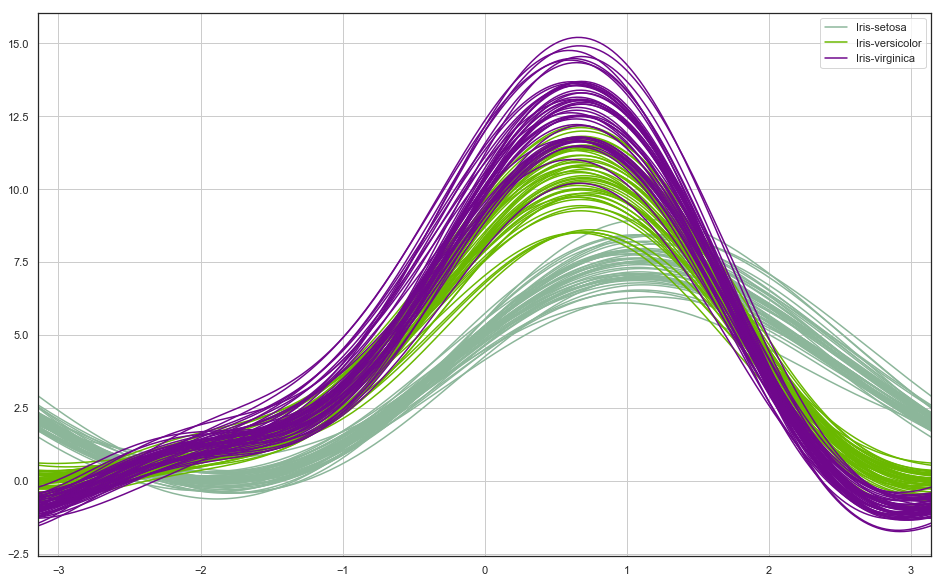

In [8]:
plt.figure(figsize=(16, 10))
andrews_curves(iris_df, 'Species');

### Training and Predicting
***
Lets split the data into training and testing sets using the train_test_split method from sklearn. X_train contains 75% of the dataset and X_test will contain the other 25%.

In [9]:
y = iris_df['Species']
X = iris_df.drop('Species', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train Shape, ", X_train.shape)
print("X_test Shape, ", X_test.shape)

X_train Shape,  (112, 4)
X_test Shape,  (38, 4)


In [10]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
Name: Species, dtype: object

Since we saw clustering in our data while visualizing it, lets use the K-nearest neighbour classifier with 1 neighbour. After training our model using the training data and testing it against the test data, we get a score of 0.97 or 97%.

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Lets create a confusion matrix to see where our model went wrong. Its seems that the only error our model had with the test set, was incorrectly predicting the iris to be of the Virginica species when it was actually part of the versicolor species.

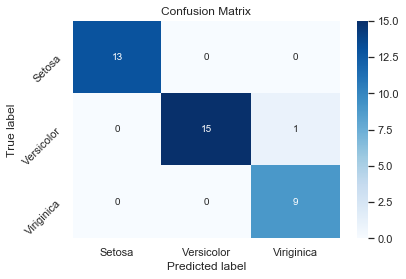

In [17]:
y_pred = knn.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred) 

ticks= ["Setosa", "Versicolor", "Viriginica"]

sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=ticks, yticklabels=ticks)
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=45); 